In [1]:
import pandas as pd
pd.set_option('display.max_rows', 10000)
pd.options.mode.chained_assignment = None
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import DTree

In [2]:
D1 = pd.read_csv('../data/D1.txt', sep=' ', names=['X1','X2','Y'])
D2 = pd.read_csv('../data/D2.txt', sep=' ', names=['X1','X2','Y'])
D3leaves = pd.read_csv('../data/D3leaves.txt', sep=' ', names=['X1','X2','Y'])
Dbig = pd.read_csv('../data/Dbig.txt', sep=' ', names=['X1','X2','Y'])
Druns = pd.read_csv('../data/Druns.txt', sep=' ', names=['X1','X2','Y'])

In [3]:
print("D1: X1[%.7f, %.7f]  X2[%.7f, %.7f]" % (D1.X1.min(),D1.X1.max(),D1.X2.min(), D1.X2.max()))
print("D2: X1[%.4f, %.4f]  X2[%.4f, %.4f]" % (D2.X1.min(),D2.X1.max(),D2.X2.min(), D2.X2.max()))
print("D3leaves: X1[%.4f, %.4f]  X2[%.4f, %.4f]" % (D3leaves.X1.min(),D3leaves.X1.max(),D3leaves.X2.min(), D3leaves.X2.max()))
print("Dbig: X1[%.4f, %.4f]  X2[%.4f, %.4f]" % (Dbig.X1.min(),Dbig.X1.max(),Dbig.X2.min(), Dbig.X2.max()))
print("Druns: X1[%.4f, %.4f]  X2[%.4f, %.4f]" % (Druns.X1.min(),Druns.X1.max(),Druns.X2.min(), Druns.X2.max()))

D1: X1[0.0011910, 0.9996450]  X2[0.0025160, 0.9992830]
D2: X1[0.0010, 0.9995]  X2[0.0006, 0.9986]
D3leaves: X1[1.0000, 10.0000]  X2[1.0000, 3.0000]
Dbig: X1[-1.4994, 1.4998]  X2[-1.5000, 1.4996]
Druns: X1[0.0000, 0.1000]  X2[-2.0000, 8.0000]


In [21]:
import matplotlib.pyplot as plt
def plot_classification_classes(df, title):
    fig, ax =plt.subplots(1)
    ax.scatter(df[df.Y==0].X1,df[df.Y==0].X2,color='b',marker='o',label='Class 0',s=10) 
    ax.scatter(df[df.Y==1].X1,df[df.Y==1].X2,color='r',marker='o',label='Class 1',s=10)
    ax.set_xlabel('x1 feature',weight='bold')
    ax.set_ylabel('x2 feature',weight='bold')
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray')
    ax.xaxis.grid(color='gray')
    ax.set_title(title,weight='bold')

In [5]:
import math

def entropy(df, feature_name, split_val):
    pr_x_gte = len(df[df[feature_name]>=split_val]) / len(df)
    pr_x_lt = len(df[df[feature_name]<split_val]) / len(df)
    entorpy=0
    if pr_x_gte == 0:
        entropy = pr_x_lt * math.log2(pr_x_lt)
    elif pr_x_lt == 0:
        entropy = pr_x_gte * math.log2(pr_x_gte)
    else:
        entropy = (pr_x_gte * math.log2(pr_x_gte)) + (pr_x_lt * math.log2(pr_x_lt))
    return -entropy

def conditional_entropy(df, feature_name, split_val, label_name):
    conditional_entropy = 0
    for label in df[label_name].unique():
        #when x>=split_val
        pr_xy = len(df[(df[label_name]==label) & (df[feature_name]>=split_val)]) / len(df)
        pr_x = len(df[df[feature_name]>=split_val]) / len(df)
        if (pr_xy>0) and (pr_x>0):
            conditional_entropy += (pr_xy * math.log2(pr_xy/pr_x))
        #when x<split_val
        pr_xy = len(df[(df[label_name]==label) & (df[feature_name]<split_val)]) / len(df)
        pr_x = len(df[df[feature_name]<split_val]) / len(df)
        if (pr_xy>0) and (pr_x>0):
            conditional_entropy += (pr_xy * math.log2(pr_xy/pr_x))
    return -conditional_entropy
         
def info_gain(df, feature_name, split_val, label_name):
    #print('H(Y):', entropy(df, label_name, 1))
    #print('H(Y|S):', conditional_entropy(df, feature_name, split_val, label_name))
    return entropy(df, label_name, 1) - conditional_entropy(df, feature_name, split_val, label_name)

def gain_ratio(df, feature_name, split_val, label_name):
    #print('info_gain:', info_gain(df, feature_name, split_val, label_name))
    #print('H(S):', entropy(df, feature_name, split_val))
    return info_gain(df, feature_name, split_val, label_name) / entropy(df, feature_name, split_val)

print(entropy(D1,'Y', 1))
print(conditional_entropy(D1,'X1',D1.iloc[50,0],'Y'))
print(info_gain(D1,'X1',D1.iloc[50,0],'Y'))
print(gain_ratio(D1,'X1',D1.iloc[210,0],'Y'))

0.6690158350565576
0.6680134539453131
0.0010023811112445102
0.00041034722940131547


# Question 2.2)

In [7]:
custom_df = pd.DataFrame([[0,0,1],[0,1,0],[1,1,1],[1,0,0]],
                         columns=['X1','X2','Y'],)
custom_df.head(10)

,X1,X2,Y
0,0,0,1
1,0,1,0
2,1,1,1
3,1,0,0


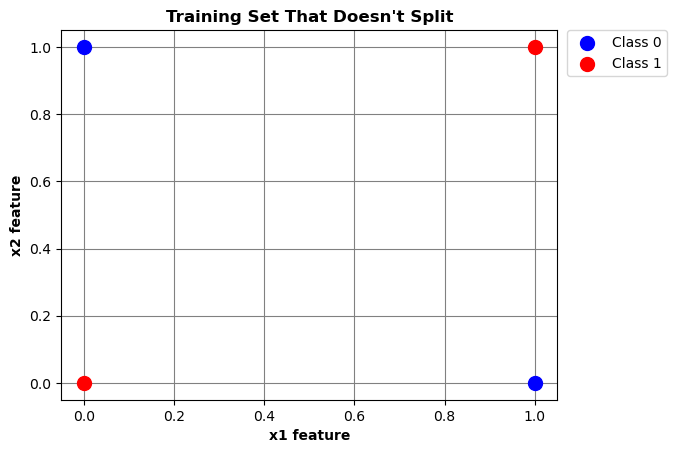

In [19]:
plot_classification_classes(custom_df, 'Training Set That Doesn\'t Split')

# Question 2.3)

In [14]:
Druns.head(100)

,X1,X2,Y
0,0.1,-2,0
1,0.0,-1,1
2,0.0,0,0
3,0.0,1,0
4,0.0,2,0
5,0.0,3,0
6,0.0,4,0
7,0.0,5,0
8,0.0,6,1
9,0.0,7,0


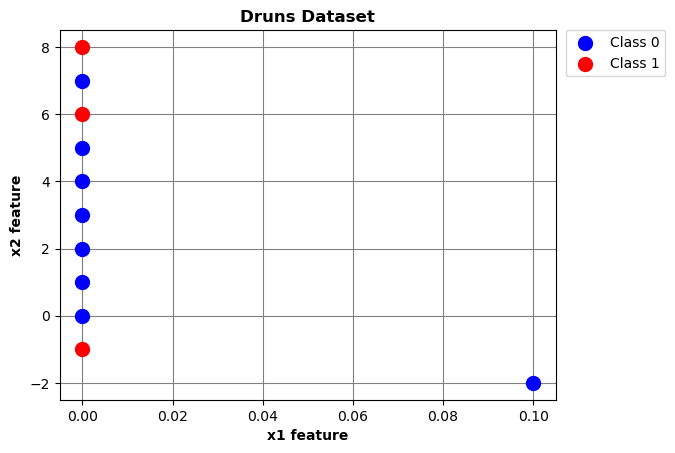

In [21]:
plot_classification_classes(Druns, 'Druns Dataset')

In [41]:
def get_candidate_splits(df, feature_list):
    C = []
    for feature in feature_list:
        split_values = []
        for i in range(0,len(df[feature])):
            if df[feature][i] not in split_values:
                split_values.append(df[feature][i])
                C.append([feature, df[feature][i]])
    return C

C_q3 = get_candidate_splits(Druns, ['X1','X2'])

In [43]:
C_q3

[['X1', 0.1],
 ['X1', 0.0],
 ['X2', -2],
 ['X2', -1],
 ['X2', 0],
 ['X2', 1],
 ['X2', 2],
 ['X2', 3],
 ['X2', 4],
 ['X2', 5],
 ['X2', 6],
 ['X2', 7],
 ['X2', 8]]

In [62]:
def do_q3(df, candidate_splits, label_name):
    for split in candidate_splits:
        if entropy(df, feature_name=split[0], split_val=split[1]) != 0:
            gain_rati = gain_ratio(df, feature_name=split[0], split_val=split[1], label_name=label_name)
            print(split[0],' >= ',split[1],'  \tGain Ratio: %.5f' % gain_rati, sep='')
        else:
            info_gai = info_gain(df, split[0], split[1], label_name)
            print(split[0],' >= ',split[1],'\tMutual Info: %.5f' % info_gai, sep='')

do_q3(Druns, C_q3, 'Y')

X1 >= 0.1  	Gain Ratio: 0.10052
X1 >= 0.0	Mutual Info: 0.00000
X2 >= -2	Mutual Info: 0.00000
X2 >= -1  	Gain Ratio: 0.10052
X2 >= 0  	Gain Ratio: 0.05595
X2 >= 1  	Gain Ratio: 0.00578
X2 >= 2  	Gain Ratio: 0.00114
X2 >= 3  	Gain Ratio: 0.01641
X2 >= 4  	Gain Ratio: 0.04975
X2 >= 5  	Gain Ratio: 0.11124
X2 >= 6  	Gain Ratio: 0.23610
X2 >= 7  	Gain Ratio: 0.05595
X2 >= 8  	Gain Ratio: 0.43016


# Question 2.4)

In [6]:
D3leaves.head(100)

,X1,X2,Y
0,10,1,1
1,10,2,1
2,10,3,1
3,1,1,0
4,1,3,1


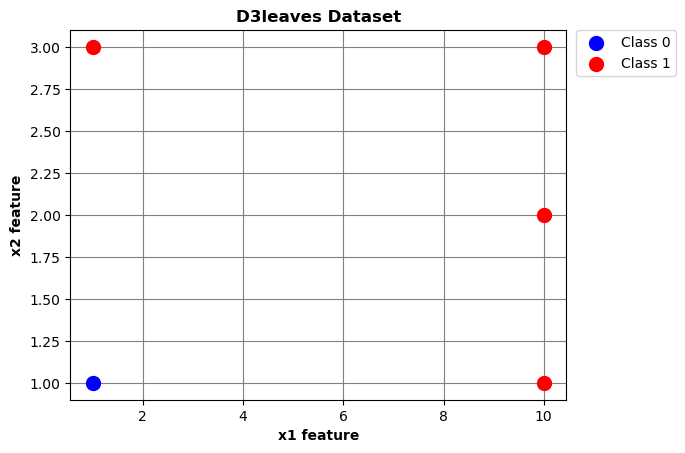

In [24]:
plot_classification_classes(D3leaves, 'D3leaves Dataset')

In [8]:
model = DTree.DecisionTreeClassifier()
tree = model.train(D3leaves, ['X1','X2'], 'Y')

In [9]:
print("              X1>=10.0           ")
print("            T/        \F         ")
print("          Y=1         X2>=3.0    ")
print("                     T/     \F   ")
print("                    Y=1     Y=0")

              X1>=10.0           
            T/        \F         
          Y=1         X2>=3.0    
                     T/     \F   
                    Y=1     Y=0


# Question 2.5)

In [6]:
model = DTree.DecisionTreeClassifier()
root = model.train(D1, ['X1','X2'], 'Y')

X2>=0.201829 at depth 0


In [13]:
print(root.split_feature)
print(root.split_value)

X2
0.201829


In [15]:
print(root.left.df[root.left.label_name].mode())
print(root.left.leaf)

0    1
Name: Y, dtype: int64
True


In [19]:
print(root.right.df[root.right.label_name].mode())
print(root.right.split_feature)

0    0
Name: Y, dtype: int64
None


In [7]:
print(model.depth)

1


In [22]:
print("             X2>=0.201829")
print("            T/          \F")
print("          Y=1           Y=0")

             X2>=0.201829
            T/          \F
          Y=1           Y=0


In [8]:
model = DTree.DecisionTreeClassifier()
root = model.train(D2, ['X1','X2'], 'Y')

X1>=0.533076 at depth 0
X2>=0.228007 at depth 0
X2>=0.424906 at depth 0
X1>=0.708127 at depth 0
X2>=0.32625 at depth 0
X1>=0.595471 at depth 0
X1>=0.646007 at depth 0
X2>=0.403494 at depth 0
X1>=0.887224 at depth 6
X2>=0.037708 at depth 6
X2>=0.082895 at depth 6
X1>=0.960783 at depth 6
X1>=0.850316 at depth 9
X2>=0.169053 at depth 9
X2>=0.88635 at depth 13
X1>=0.041245 at depth 13
X1>=0.104043 at depth 13
X1>=0.07642 at depth 13
X2>=0.691474 at depth 16
X1>=0.254049 at depth 16
X1>=0.191915 at depth 16
X2>=0.792752 at depth 16
X2>=0.864128 at depth 17
X1>=0.144781 at depth 17
X2>=0.534979 at depth 21
X1>=0.426073 at depth 21
X1>=0.409972 at depth 21
X1>=0.417579 at depth 21
X1>=0.393227 at depth 22
X1>=0.39583 at depth 22


In [9]:
print(model.depth)

30


In [10]:
print(root.right.split_feature)
print(root.right.split_value)

X2
0.88635


In [47]:
print(root.left.right.left.left.split_feature)
print(root.left.right.left.left.split_value)

X2
0.082895


# Question 2.6)

Text(0.5, 1.0, 'D1 Dataset')

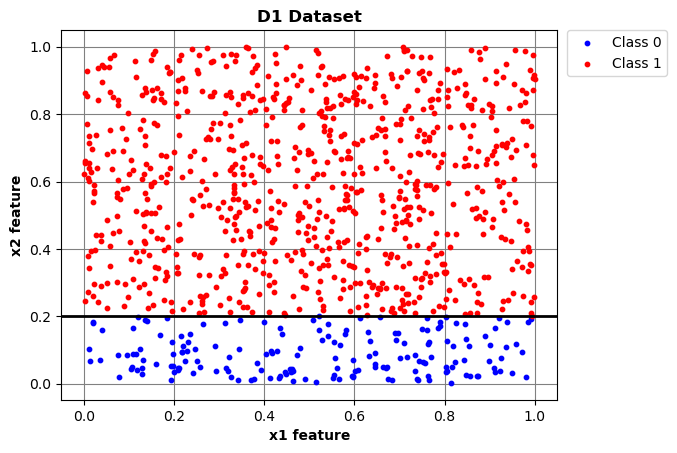

In [23]:
fig, ax =plt.subplots(1)
ax.scatter(D1[D1.Y==0].X1,D1[D1.Y==0].X2,color='b',marker='o',label='Class 0',s=10) 
ax.scatter(D1[D1.Y==1].X1,D1[D1.Y==1].X2,color='r',marker='o',label='Class 1',s=10)
ax.axline((0,.2),(1,.2),linewidth=2,color='black')
ax.set_xlabel('x1 feature',weight='bold')
ax.set_ylabel('x2 feature',weight='bold')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray')
ax.xaxis.grid(color='gray')
ax.set_title('D1 Dataset',weight='bold')

Text(0.5, 1.0, 'D2 Dataset')

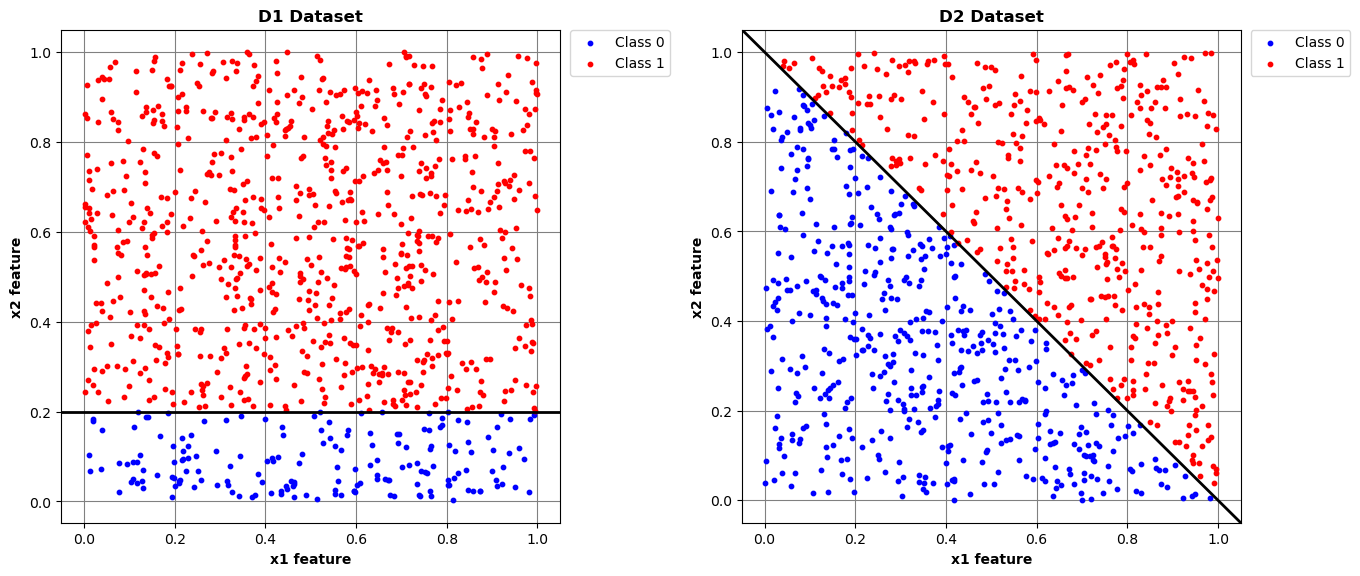

In [34]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,8))
fig.tight_layout(pad=10.0)
ax1.scatter(D1[D1.Y==0].X1,D1[D1.Y==0].X2,color='b',marker='o',label='Class 0',s=10) 
ax1.scatter(D1[D1.Y==1].X1,D1[D1.Y==1].X2,color='r',marker='o',label='Class 1',s=10)
ax1.axline((0,.2),(1,.2),linewidth=2,color='black')
ax1.set_xlabel('x1 feature',weight='bold')
ax1.set_ylabel('x2 feature',weight='bold')
ax1.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray')
ax1.xaxis.grid(color='gray')
ax1.set_title('D1 Dataset',weight='bold')
ax2.scatter(D2[D2.Y==0].X1,D2[D2.Y==0].X2,color='b',marker='o',label='Class 0',s=10) 
ax2.scatter(D2[D2.Y==1].X1,D2[D2.Y==1].X2,color='r',marker='o',label='Class 1',s=10)
ax2.axline((0,1),(1,0),linewidth=2,color='black')
ax2.set_xlabel('x1 feature',weight='bold')
ax2.set_ylabel('x2 feature',weight='bold')
ax2.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax2.set_axisbelow(True)
ax2.yaxis.grid(color='gray')
ax2.xaxis.grid(color='gray')
ax2.set_title('D2 Dataset',weight='bold')

# Question 2.7)

In [116]:
import DTree
import pandas as pd
pd.options.mode.chained_assignment = None

# read Dbig.txt into dataframe and shuffle it since it is initially sorted
Dbig = pd.read_csv('data/Dbig.txt',sep=' ',names=['X1','X2','Y']).sample(frac=1).reset_index(drop=True)

# split into training set w/ 8192 samples out of 10k, the rest are test samples
train, test = Dbig.iloc[0:8192,:],Dbig.iloc[8192:,:].reset_index(drop=True)

# generate learning curve training sets
D_8192 = train
D_2048 = D_8192.sample(n=2048).reset_index(drop=True)
D_512 = D_2048.sample(n=512).reset_index(drop=True)
D_128 = D_512.sample(n=128).reset_index(drop=True)
D_32 = D_128.sample(n=32).reset_index(drop=True)
training_list = [D_32, D_128, D_512, D_2048, D_8192]

n = [32,128,512,2048,8192]
num_nodes = []
error_rates = []
models = []
for df_train in training_list:
    model = DTree.DecisionTreeClassifier()
    model.train(df_train, ['X1','X2'], 'Y')
    models.append(model)
    df_preds = model.predict(test)
    error_rates.append(model.error_rate(df_preds,'Y','Y_hat'))
    num_nodes.append(len(model.dfs_preorder))

In [57]:
results = pd.DataFrame([n,num_nodes,error_rates]).transpose()
results.columns = ['n','num_nodes','error_rate']
results = results.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])]).format({'n':'{:,.0f}'.format,'num_nodes':'{:,.0f}'.format})
results.set_properties(**{'text-align': 'center'}).hide_index()

n,num_nodes,error_rate
32,9,0.196903
128,19,0.090708
512,53,0.062500
"2,048",137,0.031527
"8,192",259,0.022124


Text(0.5, 1.0, 'Learning Curve for Dbig Dataset')

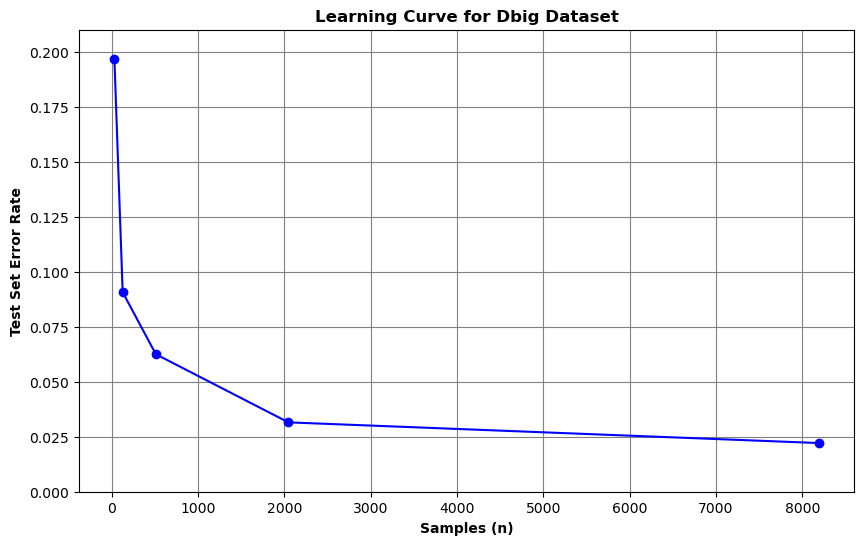

In [60]:
fig, ax = plt.subplots(1,figsize=(10,6))
plt.ylim([0,.21])
ax.plot(n,error_rates,color='b',marker='o') 
ax.set_xlabel('Samples (n)',weight='bold')
ax.set_ylabel('Test Set Error Rate',weight='bold')
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray')
ax.xaxis.grid(color='gray')
ax.set_title('Learning Curve for Dbig Dataset',weight='bold')

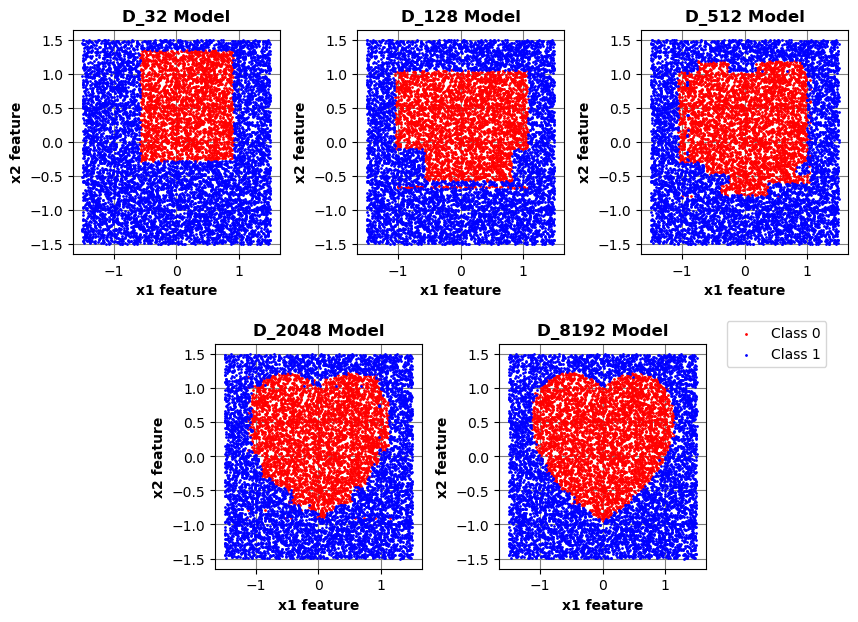

In [156]:
fig=plt.figure(figsize=(10,7))
plt.subplots_adjust(wspace=1.2,hspace=.4)

# the next 5 lines are from https://stackoverflow.com/questions/26767281/position-5-subplots-in-matplotlib
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2, )
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
axes = [ax1,ax2,ax3,ax4,ax5]

for i in range(0,5):
    pred = models[i].predict(Dbig)
    axes[i].scatter(pred[pred.Y_hat==0].X1,pred[pred.Y_hat==0].X2,color='r',marker='o',label='Class 0',s=1) 
    axes[i].scatter(pred[pred.Y_hat==1].X1,pred[pred.Y_hat==1].X2,color='b',marker='o',label='Class 1',s=1) 
    axes[i].set_xlabel('x1 feature',weight='bold')
    axes[i].set_ylabel('x2 feature',weight='bold')
    axes[i].set_axisbelow(True)
    axes[i].yaxis.grid(color='gray')
    axes[i].xaxis.grid(color='gray')
    axes[i].set_title('D_%s Model'%n[i], weight='bold')
    
ax5.legend(bbox_to_anchor=(1.1, 1), loc='center left', borderaxespad=0)

# Question 3)

In [170]:
from sklearn import tree

num_nodes_skl = []
error_rates_skl = []
models_skl = []
for df_train in training_list:
    clf = tree.DecisionTreeClassifier()
    clf.fit(df_train.iloc[:,:-1], df_train['Y'])
    models_skl.append(clf)
    df_preds = pd.DataFrame(clf.predict(test.iloc[:,:2]), columns=['Y_hat'])
    error_rates_skl.append(len(test[test['Y'] != df_preds['Y_hat']])/len(test))
    num_nodes_skl.append(clf.tree_.node_count)

In [172]:
results_skl = pd.DataFrame([n,num_nodes_skl,error_rates_skl]).transpose()
results_skl.columns = ['n','num_nodes','error_rate']
results_skl = results_skl.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])]).format({'n':'{:,.0f}'.format,'num_nodes':'{:,.0f}'.format})
results_skl.set_properties(**{'text-align': 'center'}).hide_index()

n,num_nodes,error_rate
32,9,0.160951
128,23,0.114491
512,43,0.042588
"2,048",111,0.022677
"8,192",233,0.014381


Text(0.5, 1.0, "Learning Curve for Dbig Dataset Using Sklearn's DecisionTreeClassifier")

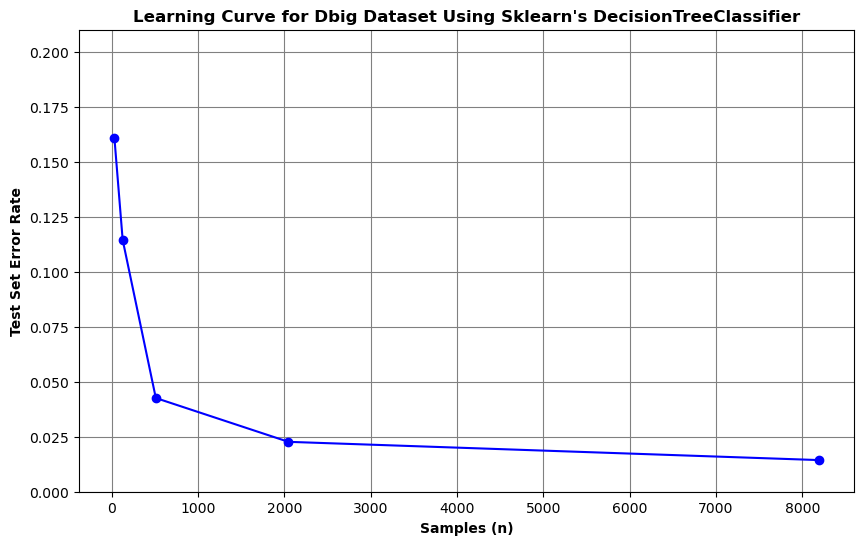

In [174]:
fig, ax = plt.subplots(1,figsize=(10,6))
plt.ylim([0,.21])
ax.plot(n,error_rates_skl,color='b',marker='o') 
ax.set_xlabel('Samples (n)',weight='bold')
ax.set_ylabel('Test Set Error Rate',weight='bold')
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray')
ax.xaxis.grid(color='gray')
ax.set_title('Learning Curve for Dbig Dataset Using Sklearn\'s DecisionTreeClassifier',weight='bold')